# Data Exploration

**Questions to answer:**
- How many features are there in the dataset?
- How many observations are there in the dataset?
- What is the data type of each feature?
- Are there any null values?
- What is the distribution of each variable?
- Do there appear to be outliers?
- Which variables are most correlated with target variable?
- Is there multicollinearity?
- Which features are the most important in terms of predictive power?

In [1]:
cd ..

/mnt/d/Projekty/spotify-recommender-system


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
sns.set_style('ticks')
sns.set_context('notebook')

palette = sns.color_palette('husl', 8)

In [4]:
df = pd.read_csv('./songs.csv', index_col=0)

## Descriptive statistics

In [5]:
df.head(10)

,acousticness,analysis_url,danceability,duration_ms,energy,id,if_liked,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
012,0.386000,https://api.spotify.com/v1/audio-analysis/5neU...,0.734,136338,0.500,5neUIFXjZLGRfjJT8YL355,1,0.042200,3,0.1700,-13.940,0,0.2620,120.016,4,https://api.spotify.com/v1/tracks/5neUIFXjZLGR...,audio_features,spotify:track:5neUIFXjZLGRfjJT8YL355,0.3820
1001,0.002190,https://api.spotify.com/v1/audio-analysis/3sPg...,0.805,441383,0.809,3sPgeZG4TPDR74wVDC6Guk,1,0.867000,7,0.0719,-10.342,0,0.0579,123.007,4,https://api.spotify.com/v1/tracks/3sPgeZG4TPDR...,audio_features,spotify:track:3sPgeZG4TPDR74wVDC6Guk,0.1990
1990s Utopia,0.525000,https://api.spotify.com/v1/audio-analysis/2g0j...,0.638,240507,0.577,2g0jE8oC141QYXvdOrOdm0,1,0.000017,11,0.1760,-9.148,0,0.1510,140.040,4,https://api.spotify.com/v1/tracks/2g0jE8oC141Q...,audio_features,spotify:track:2g0jE8oC141QYXvdOrOdm0,0.3370
1996,0.005300,https://api.spotify.com/v1/audio-analysis/2y0Y...,0.603,218173,0.700,2y0YPDnA9WUESQ55PjsNJI,1,0.002910,2,0.4270,-8.426,1,0.0305,120.995,4,https://api.spotify.com/v1/tracks/2y0YPDnA9WUE...,audio_features,spotify:track:2y0YPDnA9WUESQ55PjsNJI,0.6000
311 Trillion Years,0.021600,https://api.spotify.com/v1/audio-analysis/5Rt3...,0.641,530323,0.866,5Rt33xxWWl2eQRTPWfAxs2,1,0.798000,7,0.0926,-10.413,0,0.0367,124.019,4,https://api.spotify.com/v1/tracks/5Rt33xxWWl2e...,audio_features,spotify:track:5Rt33xxWWl2eQRTPWfAxs2,0.2180
7700M - Original Mix,0.064200,https://api.spotify.com/v1/audio-analysis/3RLY...,0.797,412199,0.526,3RLYmGWrMfu9hal0QyXpe1,1,0.754000,8,0.0627,-9.392,1,0.0546,124.029,4,https://api.spotify.com/v1/tracks/3RLYmGWrMfu9...,audio_features,spotify:track:3RLYmGWrMfu9hal0QyXpe1,0.3440
9 Crimes,0.913000,https://api.spotify.com/v1/audio-analysis/08YE...,0.329,219227,0.167,08YEGpKt2LHJ0URCXKHEie,1,0.000096,0,0.0921,-13.103,1,0.0296,74.174,4,https://api.spotify.com/v1/tracks/08YEGpKt2LHJ...,audio_features,spotify:track:08YEGpKt2LHJ0URCXKHEie,0.0995
@ (trailer),0.290000,https://api.spotify.com/v1/audio-analysis/4fsZ...,0.822,255202,0.727,4fsZcOEWUxFyDe1ENTbvLM,1,0.000000,3,0.2720,-6.899,0,0.1840,127.941,4,https://api.spotify.com/v1/tracks/4fsZcOEWUxFy...,audio_features,spotify:track:4fsZcOEWUxFyDe1ENTbvLM,0.8220
A Baru In New York - Flume Soundtrack Version,0.476000,https://api.spotify.com/v1/audio-analysis/2oAe...,0.213,337500,0.722,2oAeHCB85z6AwS45UBcYVI,1,0.815000,4,0.3440,-7.400,0,0.0790,117.875,4,https://api.spotify.com/v1/tracks/2oAeHCB85z6A...,audio_features,spotify:track:2oAeHCB85z6AwS45UBcYVI,0.0889
"A Coroa De Ouro - Joe Manina, Antonio Manero Spaziani Radio Edit",0.000755,https://api.spotify.com/v1/audio-analysis/0qwY...,0.701,178320,0.896,0qwYyqEdvkOu7l2MNJZMkT,1,0.782000,9,0.2840,-6.576,0,0.0464,125.067,4,https://api.spotify.com/v1/tracks/0qwYyqEdvkOu...,audio_features,spotify:track:0qwYyqEdvkOu7l2MNJZMkT,0.6290


### Description of audio features from Spotify API documentation:

![audio_features](./imgs/audio_features.jpg)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1970 entries, 012 to Żółte flamastry i grube katechetki
Data columns (total 19 columns):
acousticness        1970 non-null float64
analysis_url        1970 non-null object
danceability        1970 non-null float64
duration_ms         1970 non-null int64
energy              1970 non-null float64
id                  1970 non-null object
if_liked            1970 non-null int64
instrumentalness    1970 non-null float64
key                 1970 non-null int64
liveness            1970 non-null float64
loudness            1970 non-null float64
mode                1970 non-null int64
speechiness         1970 non-null float64
tempo               1970 non-null float64
time_signature      1970 non-null int64
track_href          1970 non-null object
type                1970 non-null object
uri                 1970 non-null object
valence             1970 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 307.8+ KB


In [7]:
df = df.drop(['analysis_url', 'id', 'track_href', 'type', 'uri'], axis=1)

In [8]:
df.head()

,acousticness,danceability,duration_ms,energy,if_liked,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
012,0.38600,0.734,136338,0.500,1,0.042200,3,0.1700,-13.940,0,0.2620,120.016,4,0.382
1001,0.00219,0.805,441383,0.809,1,0.867000,7,0.0719,-10.342,0,0.0579,123.007,4,0.199
1990s Utopia,0.52500,0.638,240507,0.577,1,0.000017,11,0.1760,-9.148,0,0.1510,140.040,4,0.337
1996,0.00530,0.603,218173,0.700,1,0.002910,2,0.4270,-8.426,1,0.0305,120.995,4,0.600
311 Trillion Years,0.02160,0.641,530323,0.866,1,0.798000,7,0.0926,-10.413,0,0.0367,124.019,4,0.218


In [9]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
if_liked            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [10]:
df.describe()

,acousticness,danceability,duration_ms,energy,if_liked,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,0.194747,0.631029,251991.789848,0.693370,0.605076,0.214438,5.572081,0.182467,-7.612876,0.437563,0.081039,121.580147,3.959898,0.449690
std,0.264534,0.149795,85986.536982,0.208529,0.488958,0.333457,3.496372,0.146347,4.032930,0.496212,0.077193,23.453776,0.281323,0.249932
min,0.000004,0.097600,79358.000000,0.002280,0.000000,0.000000,0.000000,0.014200,-42.807000,0.000000,0.023300,50.001000,1.000000,0.029300
25%,0.008950,0.545000,195929.500000,0.570000,0.000000,0.000010,2.000000,0.091950,-9.219750,0.000000,0.037600,107.680500,4.000000,0.237250
50%,0.062550,0.653000,226688.000000,0.725000,1.000000,0.003860,6.000000,0.121500,-6.890500,0.000000,0.051200,123.915000,4.000000,0.430500
75%,0.284750,0.737000,282506.250000,0.860000,1.000000,0.382750,9.000000,0.235750,-5.020250,1.000000,0.084250,128.043500,4.000000,0.645000
max,0.996000,0.974000,916812.000000,0.998000,1.000000,0.984000,11.000000,0.979000,-0.123000,1.000000,0.762000,205.093000,5.000000,0.978000


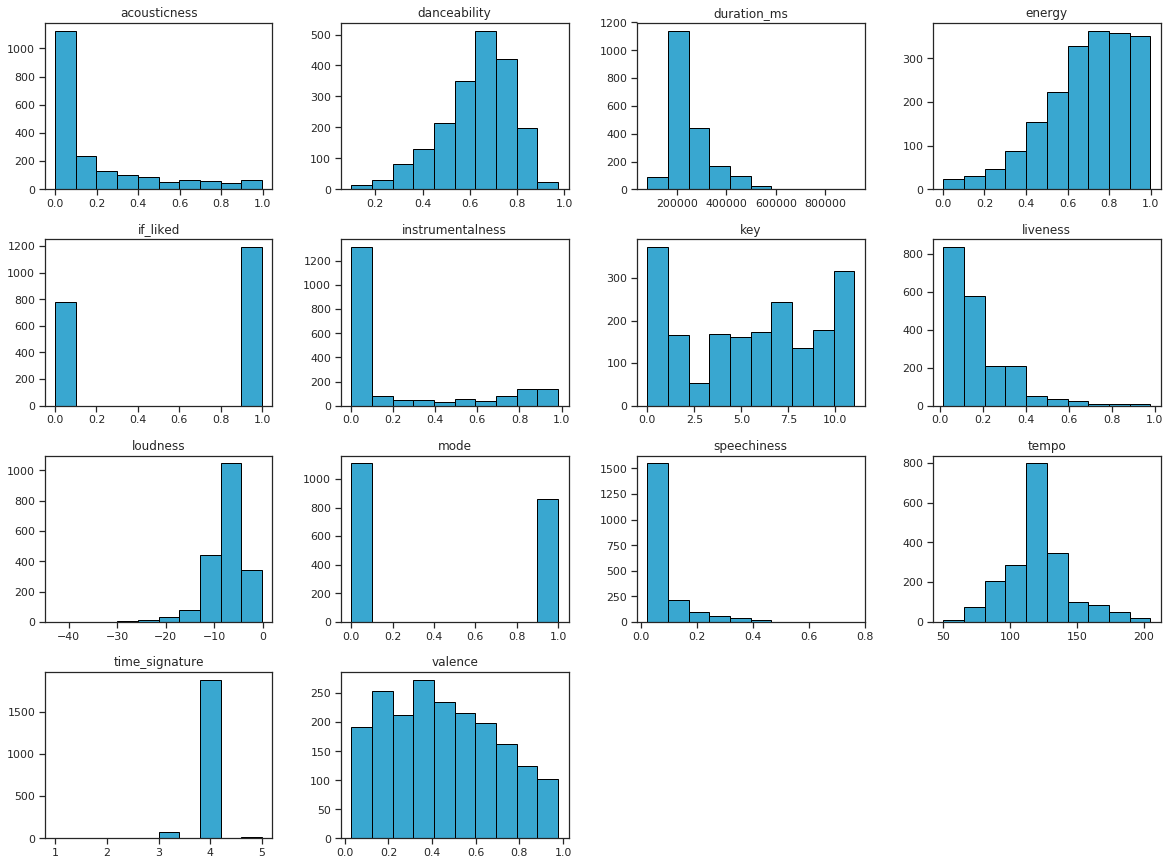

In [11]:
df.hist(figsize=(20, 15), 
        grid=False, 
        color=palette[5], 
        edgecolor='k',
        linewidth=1);

## Exploratory Data Analysis

### Categorical features

In [12]:
df['mode'].sort_values().unique()

array([0, 1])

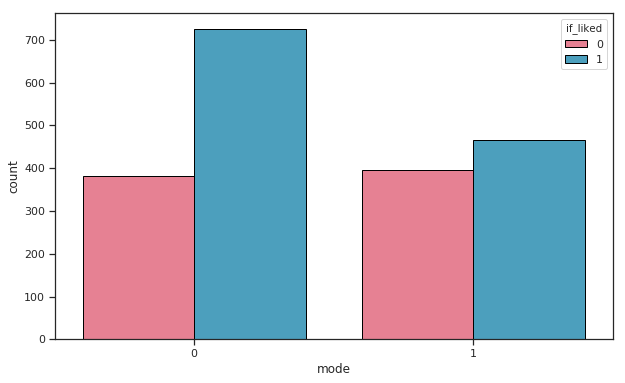

In [13]:
fig = plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              x='mode', 
              hue='if_liked', 
              palette=[palette[0], palette[5]], 
              edgecolor='k', 
              linewidth=1)

plt.show()

In [14]:
df['key'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

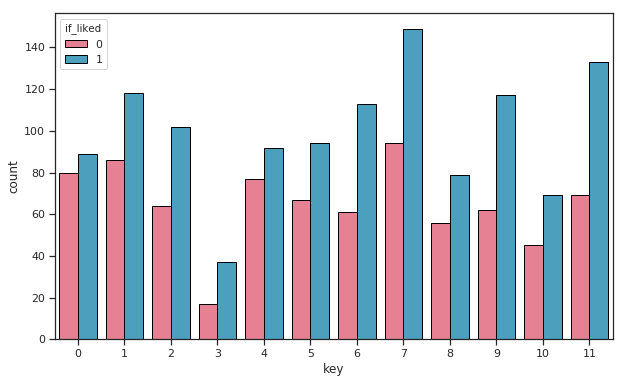

In [15]:
fig = plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              x='key', 
              hue='if_liked', 
              palette=[palette[0], palette[5]], 
              edgecolor='k', 
              linewidth=1)

plt.show()

In [16]:
df['time_signature'].sort_values().unique()

array([1, 3, 4, 5])

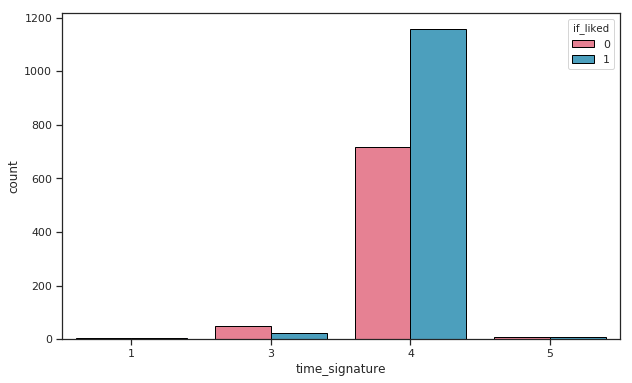

In [17]:
fig = plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              x='time_signature', 
              hue='if_liked', 
              palette=[palette[0], palette[5]], 
              edgecolor='k', 
              linewidth=1)

plt.show()

### Continuous features

In [18]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

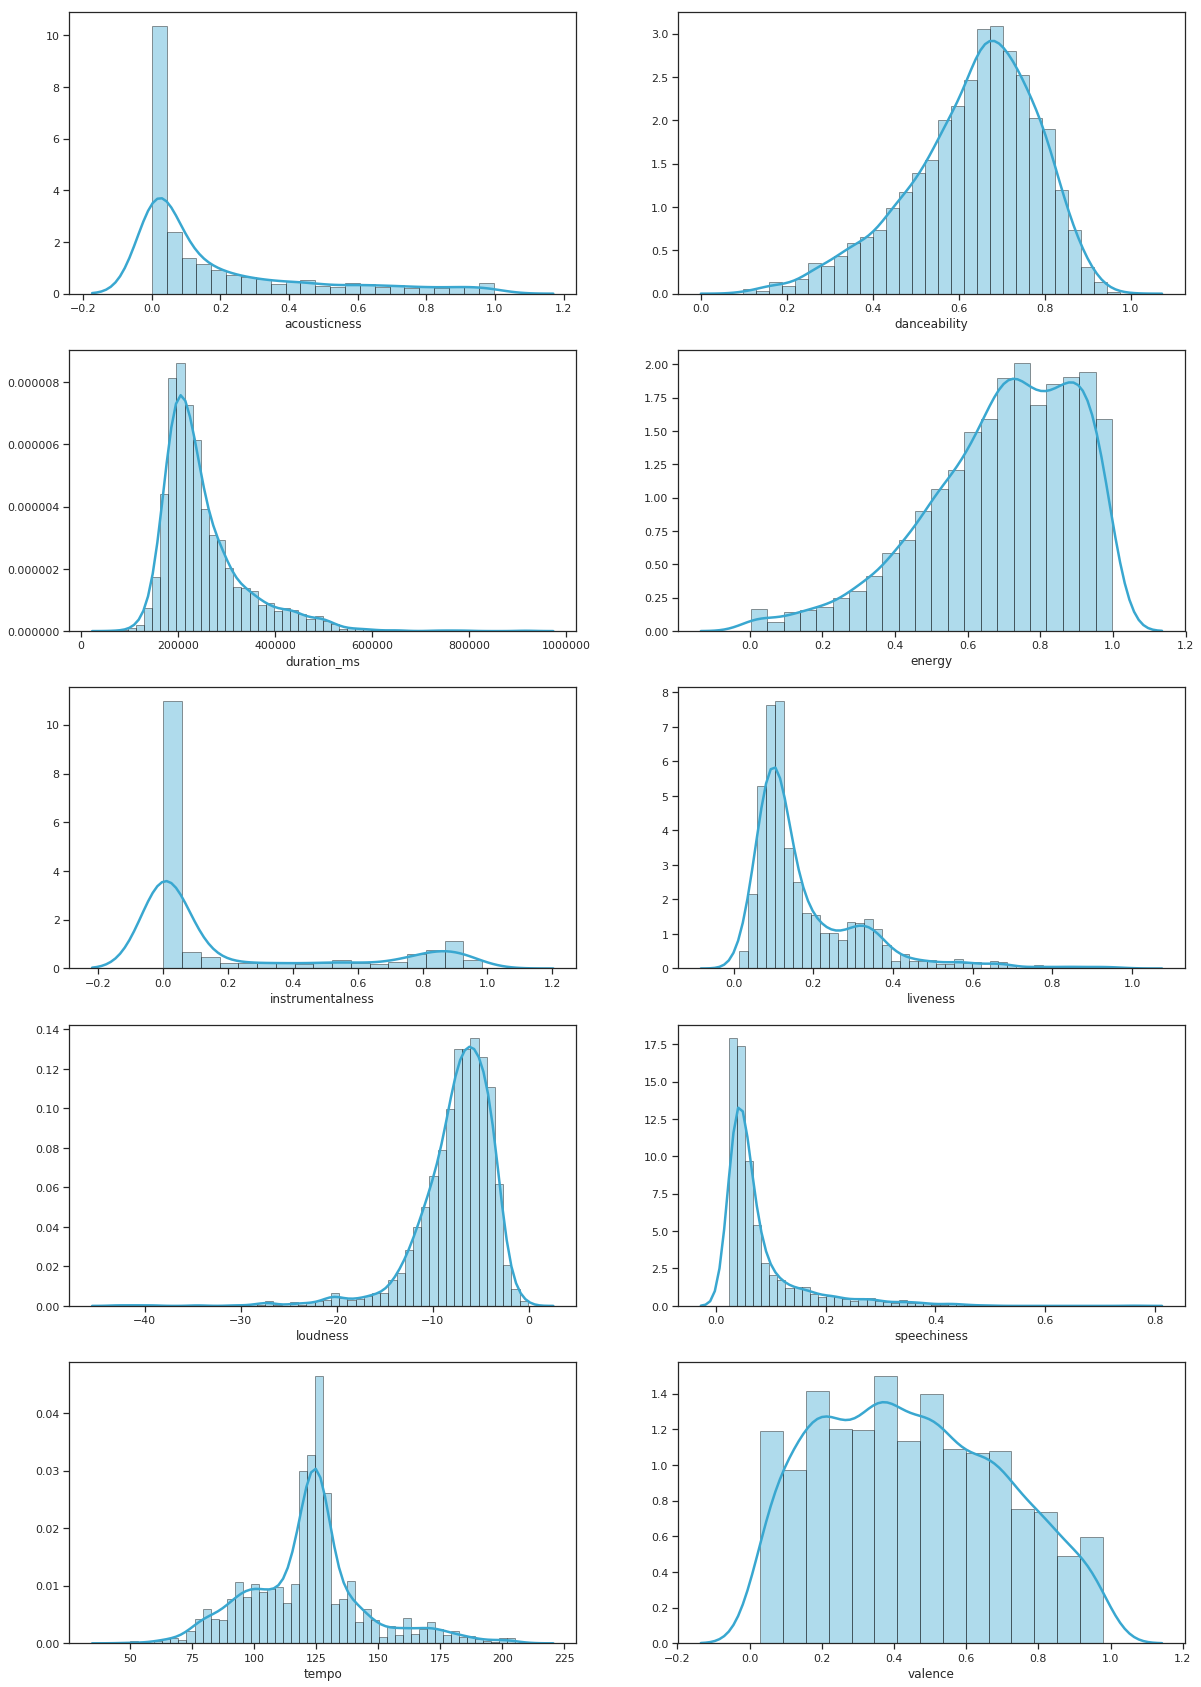

In [19]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[features[2*i+j]], 
                     ax=ax[i][j], 
                     color=palette[5], 
                     hist_kws={'edgecolor': 'k', 'linewidth': 1}, 
                     kde_kws={'linewidth': 2.5})

plt.show()

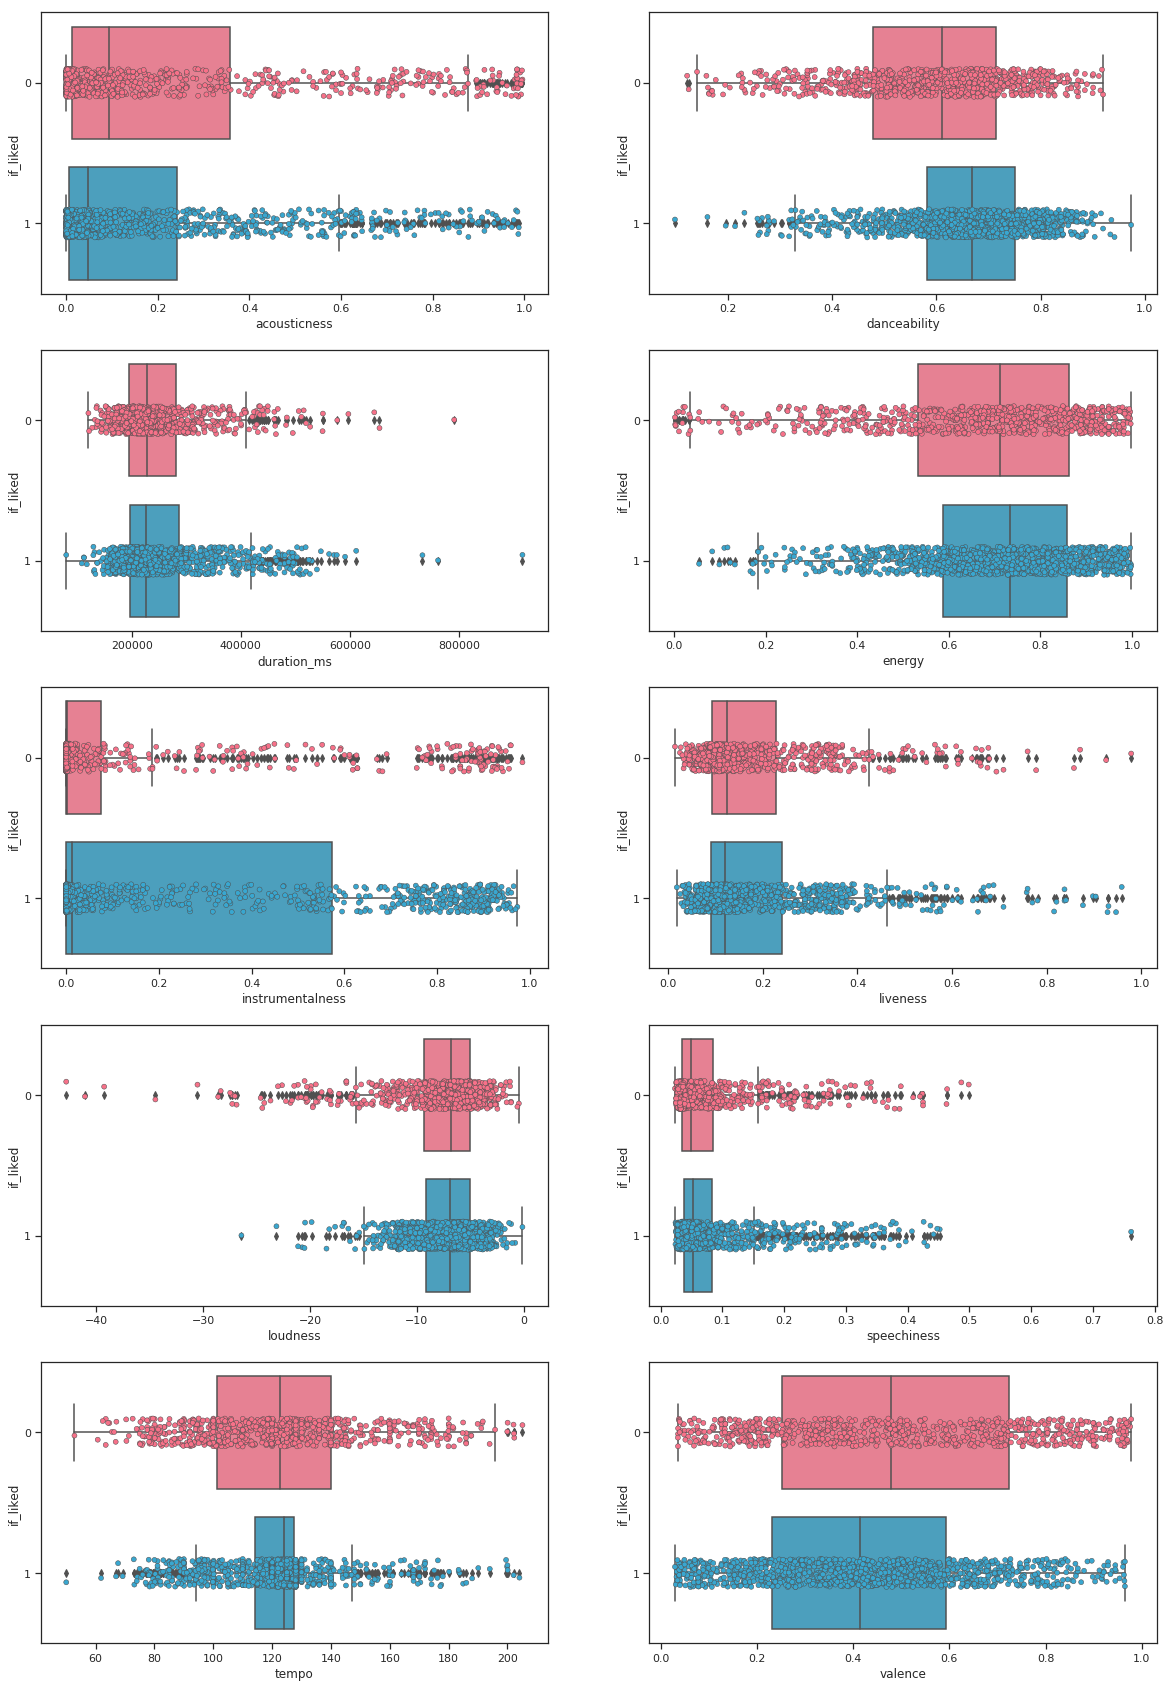

In [20]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(ax=ax[i][j], 
                    data=df, 
                    x=features[2*i+j], 
                    y='if_liked', 
                    palette=[palette[0], palette[5]], 
                    orient='h')
        
        sns.stripplot(ax=ax[i][j], 
                      data=df, 
                      x=features[2*i+j], 
                      y='if_liked', 
                      linewidth = 0.5, 
                      palette=[palette[0], palette[5]], 
                      orient = 'h')

plt.show()

### Relationships between features

<Figure size 1440x1440 with 0 Axes>

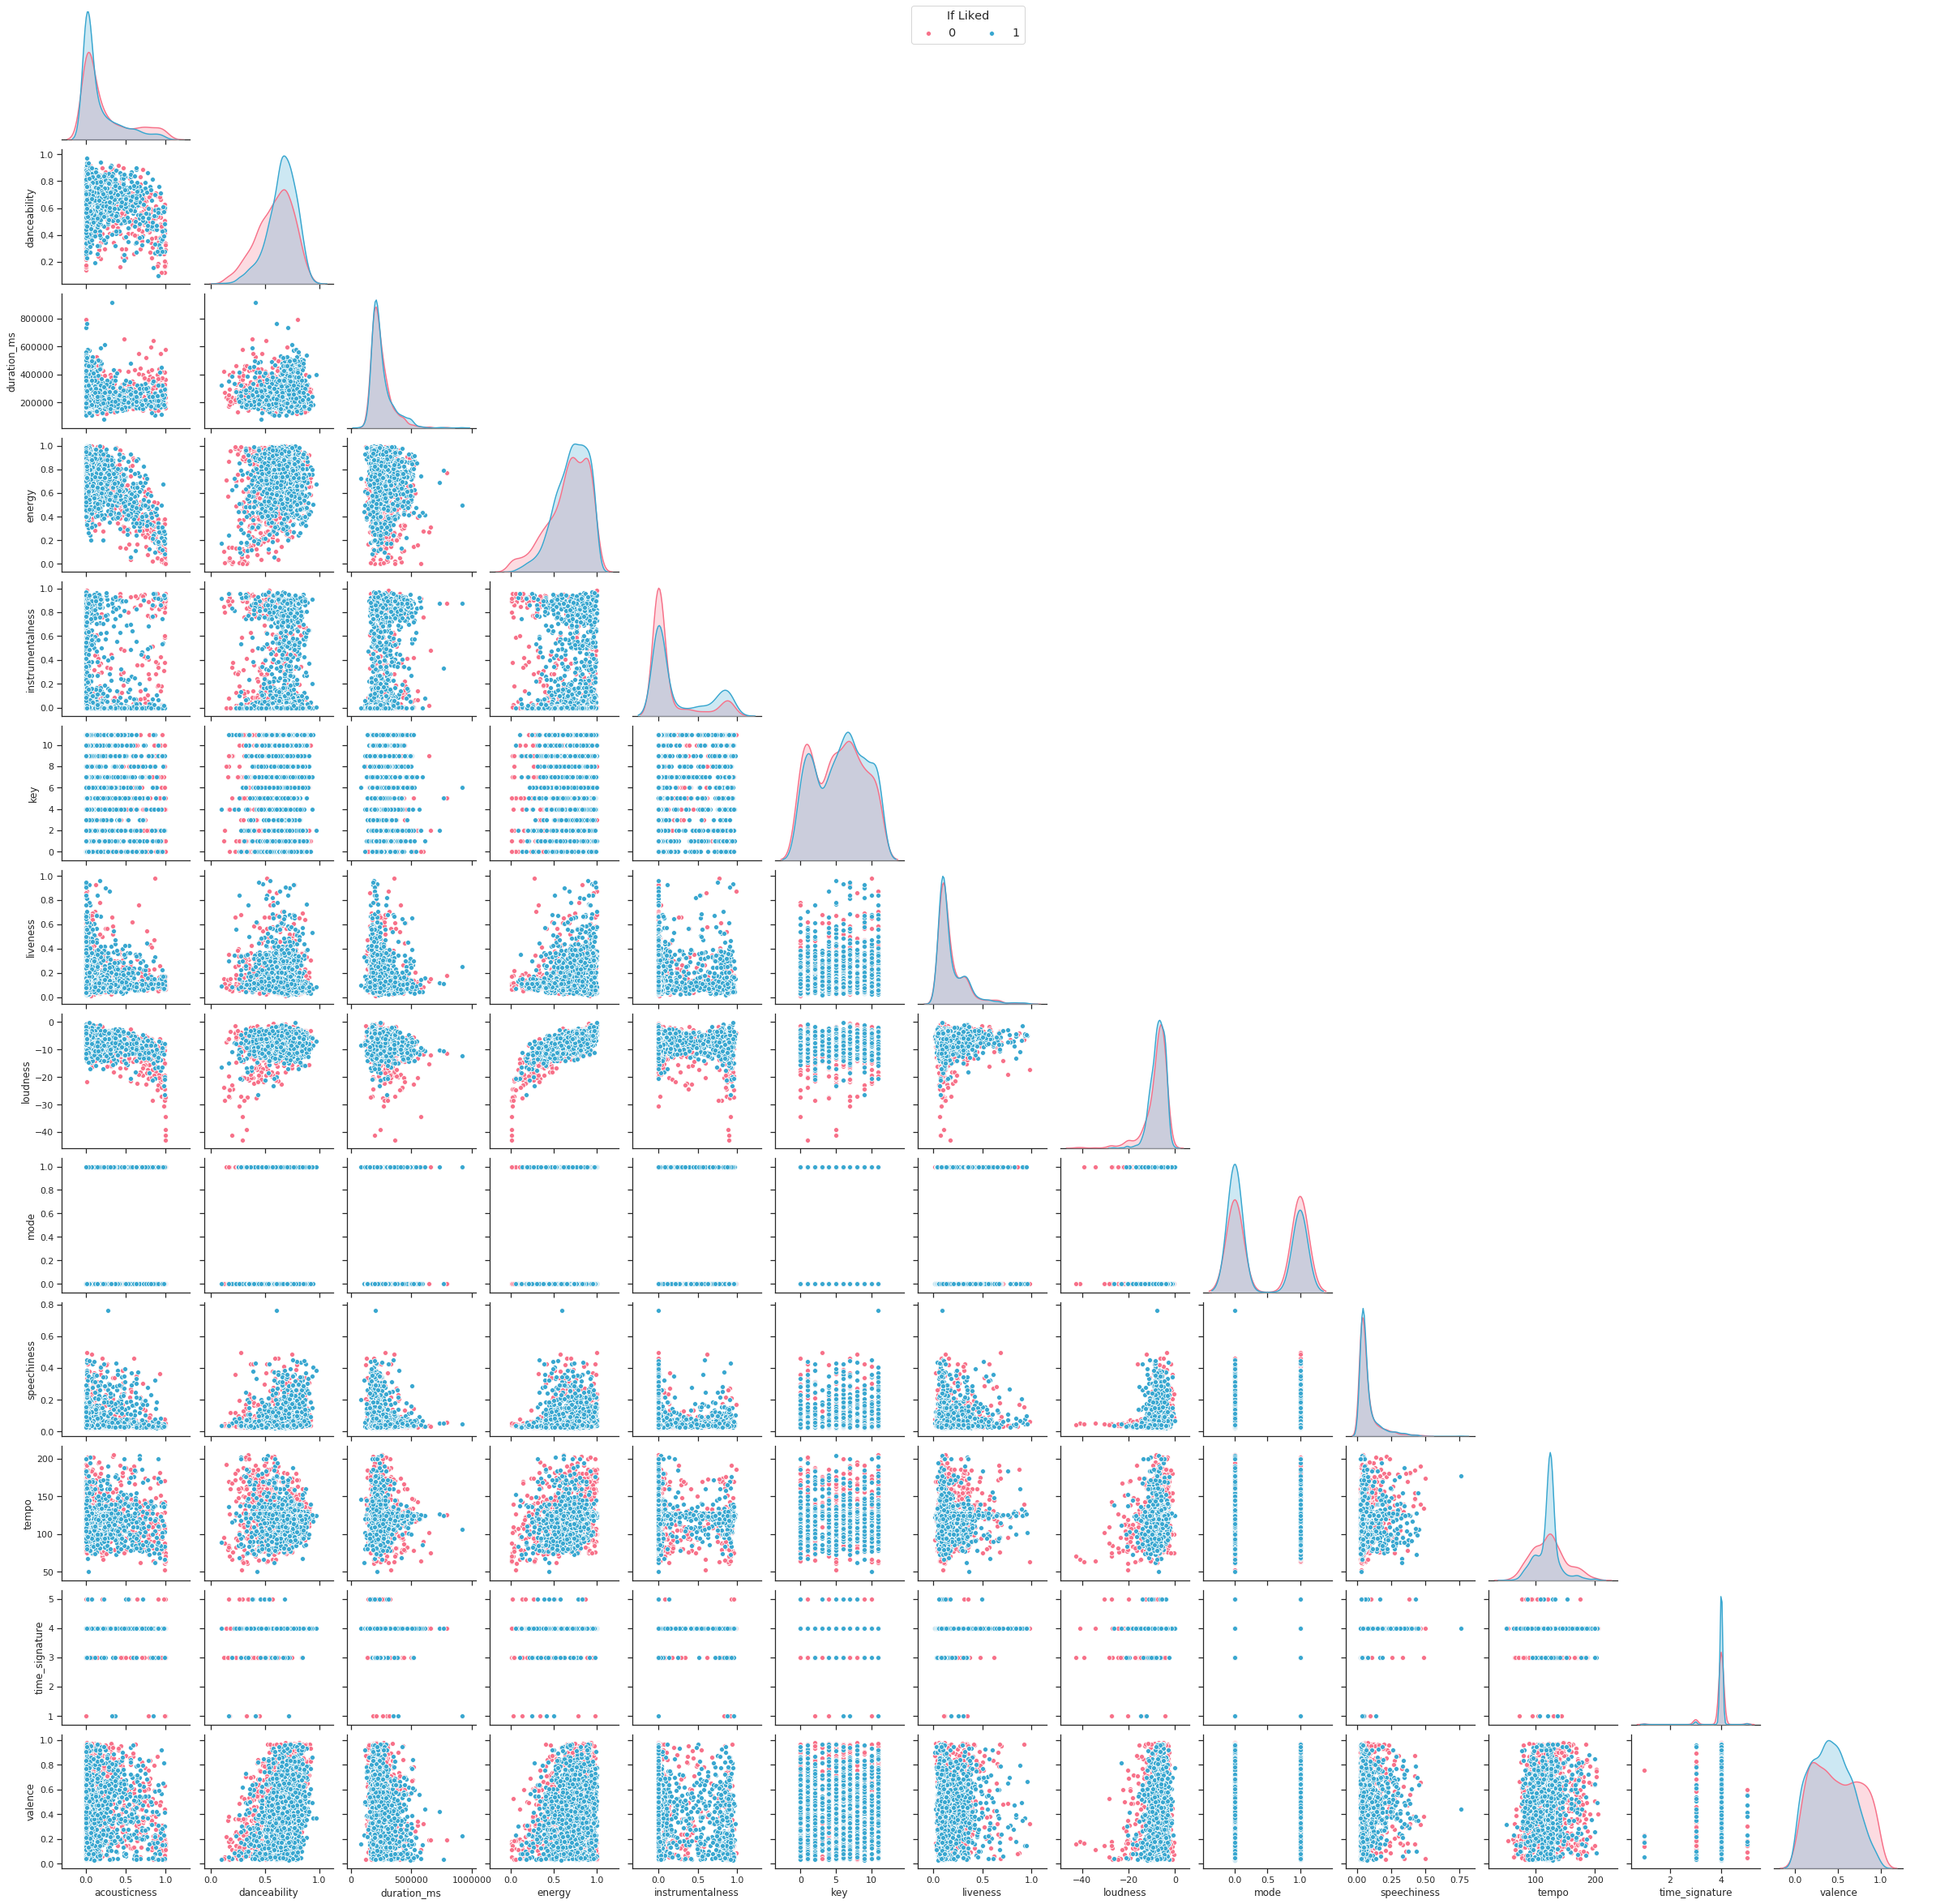

In [21]:
fig = plt.figure(figsize=(20, 20))

g = sns.pairplot(data=df, 
                 hue='if_liked', 
                 palette=[palette[0], palette[5]], 
                 corner=True)

handles = g._legend_data.values()
labels = g._legend_data.keys()

g._legend.remove()
g.fig.legend(handles=handles, 
             labels=labels,
             ncol = 2,
             title='If Liked',
             loc='upper center', 
             fontsize='large', 
             title_fontsize='large')

plt.show()

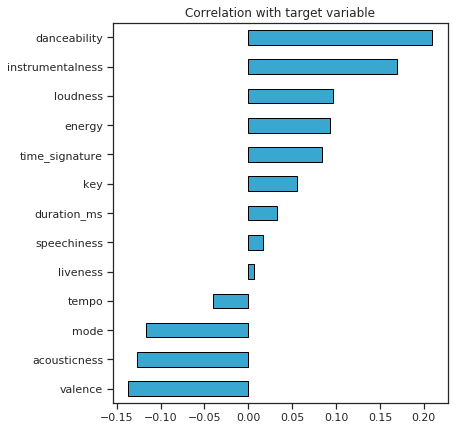

In [22]:
df.corr()['if_liked'].sort_values(ascending=True)[:-1].plot(kind='barh',
                                                            figsize=(6, 7), 
                                                            color=palette[5],
                                                            edgecolor='k',
                                                            title='Correlation with target variable');

In [23]:
df.groupby('if_liked')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
if_liked,,,,,,,,
0,778.0,0.592154,0.165206,0.1210,0.479,0.611,0.715,0.920
1,1192.0,0.656402,0.132886,0.0976,0.582,0.669,0.751,0.974


In [24]:
df.groupby('if_liked')['instrumentalness'].describe()

,count,mean,std,min,25%,50%,75%,max
if_liked,,,,,,,,
0,778.0,0.144388,0.287967,0.0,0.000003,0.000568,0.075675,0.984
1,1192.0,0.260158,0.352748,0.0,0.000042,0.013350,0.574250,0.973


In [25]:
df.groupby('if_liked')['valence'].describe()

,count,mean,std,min,25%,50%,75%,max
if_liked,,,,,,,,
0,778.0,0.492120,0.271923,0.0354,0.251,0.479,0.7230,0.978
1,1192.0,0.421996,0.230409,0.0293,0.232,0.414,0.5925,0.965


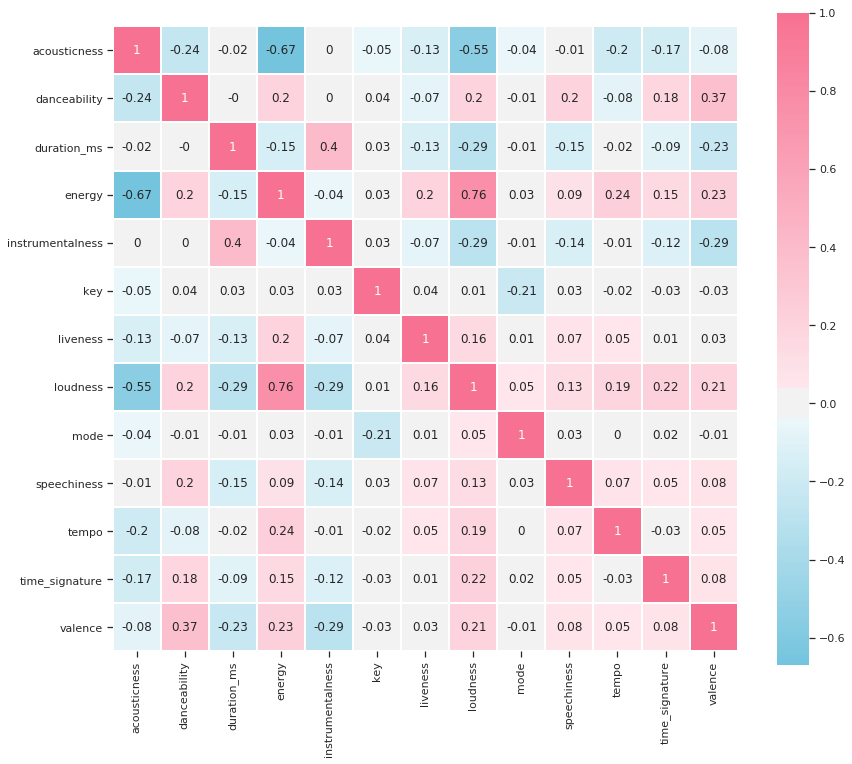

In [26]:
plt.figure(figsize=(14, 12))

correlations = round(df.corr().drop('if_liked', axis=0).drop('if_liked', axis=1), 2)
cmap = sns.diverging_palette(225, 0, s=90, l=65, n=16, as_cmap=True)

sns.heatmap(correlations, 
            cmap=cmap,
            center=0,
            annot=True, 
            linewidths=1, 
            square=True)

plt.show()

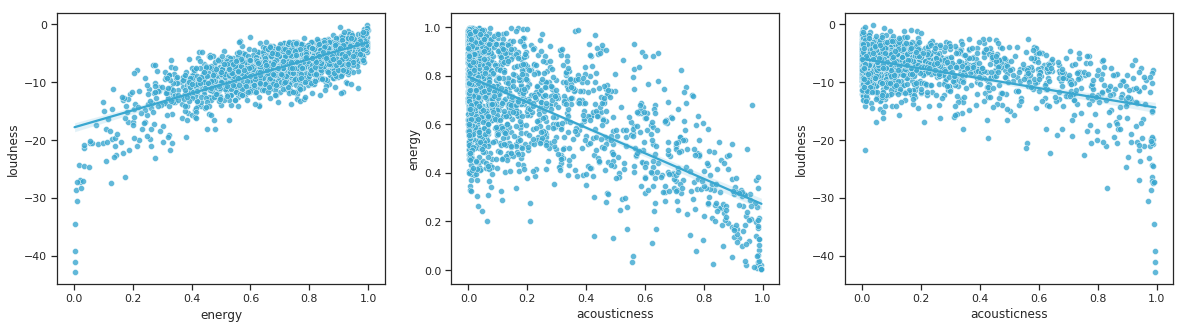

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.regplot(ax=ax[0], 
            data=df, 
            x='energy', 
            y='loudness', 
            color=palette[5], 
            scatter_kws={'lw': 0.5, 
                         'edgecolor': 'w'})

sns.regplot(ax=ax[1], 
            data=df, 
            x='acousticness', 
            y='energy', 
            color=palette[5], 
            scatter_kws={'lw': 0.5, 
                         'edgecolor': 'w'})

sns.regplot(ax=ax[2], 
            data=df, 
            x='acousticness', 
            y='loudness', 
            color=palette[5], 
            scatter_kws={'lw': 0.5, 
                         'edgecolor': 'w'})

plt.show()

### Feature importance

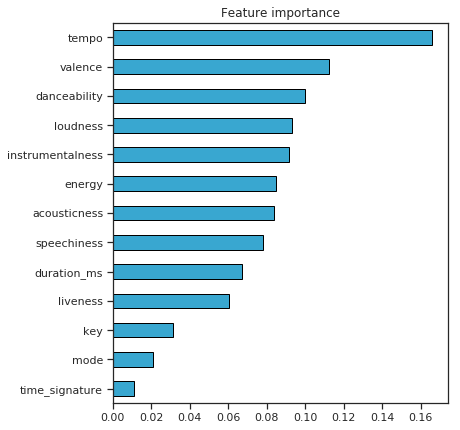

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['if_liked'], axis=1), 
                                                    df['if_liked'], 
                                                    test_size=0.2, 
                                                    random_state=11)

rf = RandomForestClassifier(n_estimators=500, random_state=11, max_depth=10)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

pd.Series(rf.feature_importances_, index = X_train.columns).sort_values().plot(kind='barh', 
                                                                               figsize=(6, 7),
                                                                               color=palette[5],
                                                                               edgecolor='k',
                                                                               title='Feature importance');

## Conclusions
- The dataset consist of 1970 observations. 60.5% of them are labeled positively and 39.5% negatively.
- There are 18 explanatory variables but 5 of them don't provide any useful information for machine learning model.
- The dataset doesn't contain any null values.
- All the selected features have numerical form. 3 of them (*mode*, *key* and *time_signature*) are discrete and the rest is continuous.
- Most of the features don't seem to follow normal distribution.
- There are some features that have significant amount of outliers such as: *liveness* and *loudness*. 
- The features with highest absolute value of linear correlation coefficient with target variable are: *danceability*, *instrumentalness* and *valence*.
- The correlation matrix indicates that there is negative linear correlation between *acousticness* and *energy* and *acousticness* and *loudness*. Also there is positive linear correlation between *energy* and *loudness*. However looking at scatter plot between those variables it may be logarithmic relationship instead.
- In terms of predictive power *tempo*, *valence* and *danceability* features are the most important for Random Forest classifier.